In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

/var/folders/s8/1hl12tjx0b71pdccf5xwchch0000gn/T/ipykernel_37469/2348643420.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sugarcane_prod=pd.read_csv('/Users/utpalkant/Data Science/EDA PROJECTs/sugarcane/List of Countries by Sugarcane Production.csv')
sugarcane_prod

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


# Data summary

- The dataset under consideration contains information on sugarcane production across various countries and continents.
- The data is about countries who produces sugarcane from different continent measured in tons for each country on differnt land area(measured in hectare) also calculated the data of sugarcane produces of each person in a country (in kg).
- this data also contains how much kg per capita have in each country and per hectare cultivated in agricultural land of the country (which shows the productivity of sugarcane of each country) 

##  Key Questions to Address :

01. Which country produces maximum sugarcane?
02. Which country has highest land?
03. Which country has highest yield per hectare?
04. Which country has highest production?
05. Do countries with highest land produce more sugarcane?
06. Do countries which yield more sugarcane per hectare produces more sugarcane in total?
07. Which continent produces maximum sugarcane?
08. Do number of countries in a Continent effects production of sugarcane?
09. Do continent with highest land produces more sugarcane?
10. show the Production distribution by continent.
11. find the corelation between columns. 

# Column Description

- Country --> this column contains different countries name in whici sugarcan cultivated.
- Continent --> this column have continient name to which different countries belongs.
- Production(Tons) --> this column have amount [in Tons] of sugarcane production each country has. 1 Ton = 1000 kg. 
- Production per Person (Kg) --> this column shows the average sugarcane production per person(in kg). it tells us that on average how much sugarcane produces for each resident in the country.
- Acreage (Hectare) --> this column provides the detail of land area usage for the cultivation of sugarcane production
    - Acreage -- (meaning) --> area of land measuredin acre 1 hectare = 2.4 acre = 107639 sqft, 1 acre = 43560 sqft 
- Yield (Kg / Hectare) --> The yield coulmn indicates the productivity of sugarcane of each country, i.e : on average how much kg production of sugarcane on each hectare.measured in kg/hectare.

#  Issue with Data :

- Dirty Data 
    - in production(Tons),Production per Person (Kg),Acreage (Hectare), and Yield (Kg / Hectare)  column have unwanted decimal places in some rows. `VALIDITY`
    - Unnamed: 0 column should niot be there.`VALIDITY`
    - production(Tons),Production per Person (Kg),Acreage (Hectare), and Yield (Kg / Hectare) column have string data type instead of integer.`VALIDITY`
    - country name == Djibouti has nan value in Acreage(Hectare) and Yield(kg/hectare). and this is the only null value in dataset.`COMPLETENESS`
    - 

## Define :-

- Defining the problem's solution
    - replacing the dot with space by replace() method.
    - change the data type of columns to int data type
    - 

In [4]:
sugarcane_prod.rename({'Index' :'Unnamed: 0'},axis=1, inplace= True)

In [5]:
sugarcane_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [6]:
sugarcane_prod.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [7]:
sugarcane_prod[sugarcane_prod['Acreage (Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [8]:
sugarcane_prod[sugarcane_prod.duplicated(subset=['Country'])]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)


## Data cleaning & preperation

In [9]:
## copying dataset
df = sugarcane_prod.copy()
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [10]:
## Replacing decimal to space
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.' , "")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.' , "")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.' , "")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.' , "")

In [11]:
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(',' , '.')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(',' , '.')

In [12]:
## replacing sapce in column names
df.rename(columns={'Production (Tons)': 'Production(Tons)', 'Production per Person (Kg)' : 'Production_per_Person(Kg)', 'Acreage (Hectare)' : 'Acreage(Hectare)','Yield (Kg / Hectare)':'Yield(Kg/Hectare)'}, inplace=True)

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.sort_values('Production(Tons)', ascending= False)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
18,Peru,South America,9832526,314768,87696,112120.2
98,Lebanon,Asia,97,16,3,28386.4
78,Rwanda,Africa,93823,7818,1103,8506.3
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
19,Ecuador,South America,8661609,507518,104661,82758.4
...,...,...,...,...,...,...
17,Myanmar,Asia,10437058,193771,16365,63776.7
76,Central African Republic,Africa,103002,21742,18466,5577.8
77,Saint Kitts and Nevis,North America,100,2164.315,18,55555.6
88,Saint Lucia,North America,10,55915,125,80


In [15]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [16]:
## changing datatype
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    103 non-null    object 
 1   Continent                  103 non-null    object 
 2   Production(Tons)           103 non-null    float64
 3   Production_per_Person(Kg)  103 non-null    float64
 4   Acreage(Hectare)           102 non-null    float64
 5   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


# Univariate analysis

In [18]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent?

In [19]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

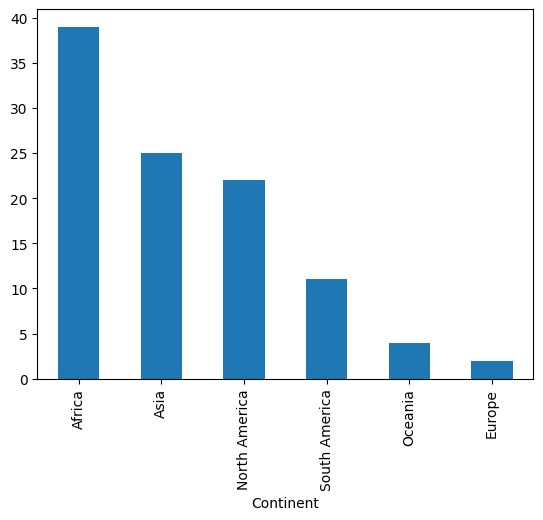

In [20]:
df['Continent'].value_counts().plot(kind='bar')

 - Africa has the maximum number of countries which produces sugarcane

## checking outliers 

In [21]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


- as we can see there is a huge difference in 50 , 75 percentile and maximum. that says us there is outliers  

<Axes: >

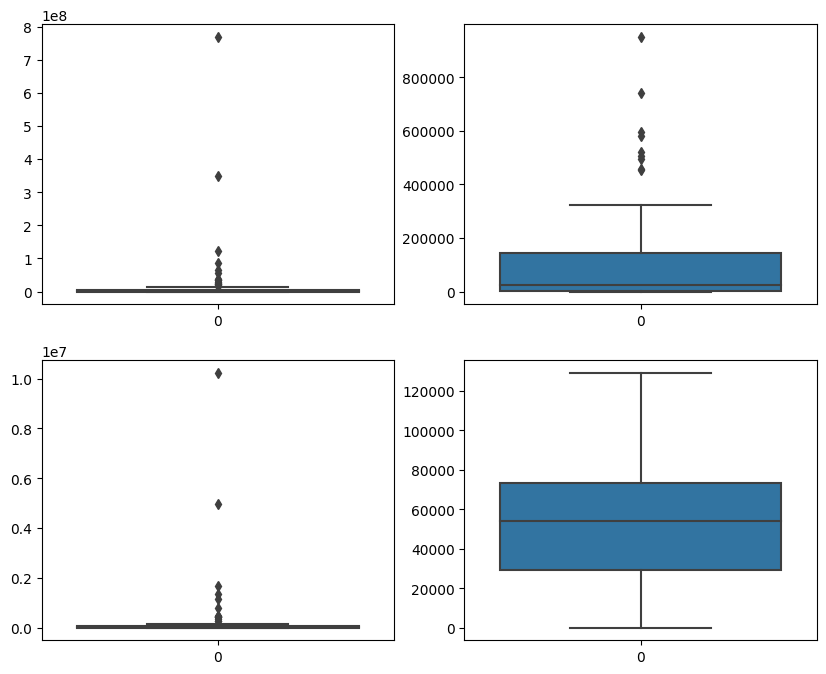

In [22]:
## checking outliers using boxplot

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

/var/folders/s8/1hl12tjx0b71pdccf5xwchch0000gn/T/ipykernel_37469/3738481804.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
/var/folders/s8/1hl12tjx0b71pdccf5xwchch0000gn/T/ipykernel_37469/3738481804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_p

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

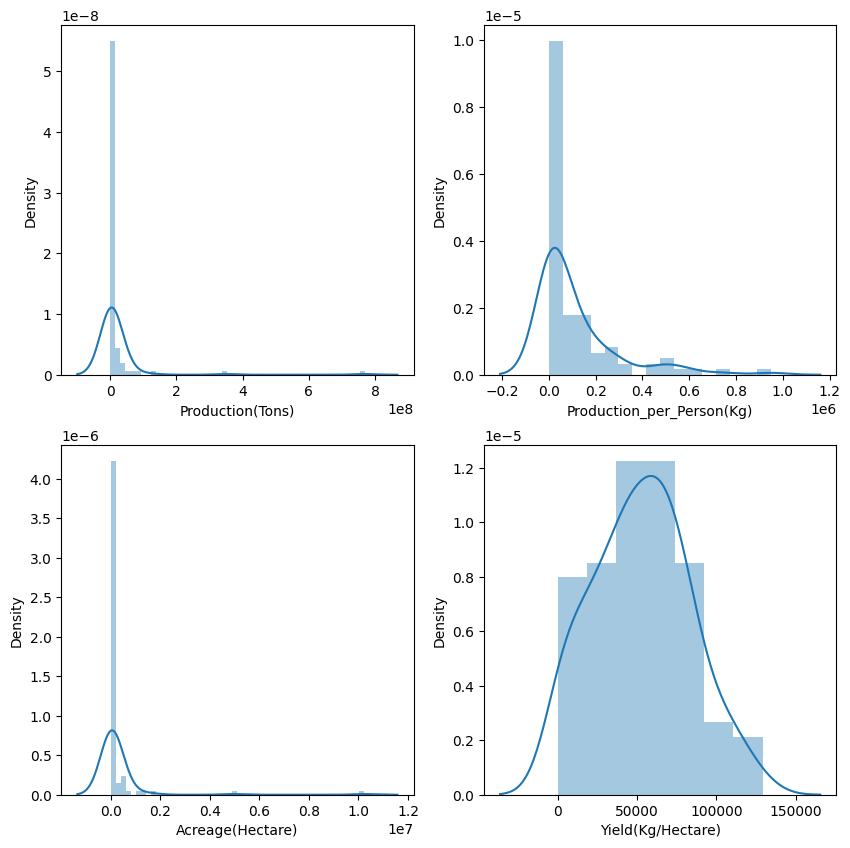

In [23]:
## checking the spread of the data of each category

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

- we havve outliers in this dataset but we cannot remove it as it shows the maximum productions    

## BiVariate analysis 

In [24]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?

In [25]:
df_new = df[['Country','Production(Tons)']].set_index('Country')
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [26]:
df_new.sort_values('Production(Tons)', ascending=False)

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Djibouti,53.0
Singapore,50.0
Samoa,12.0


In [27]:
df_new['Production(Tons)_percentage'] = df_new['Production(Tons)']*100 /  df_new['Production(Tons)'].sum()
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

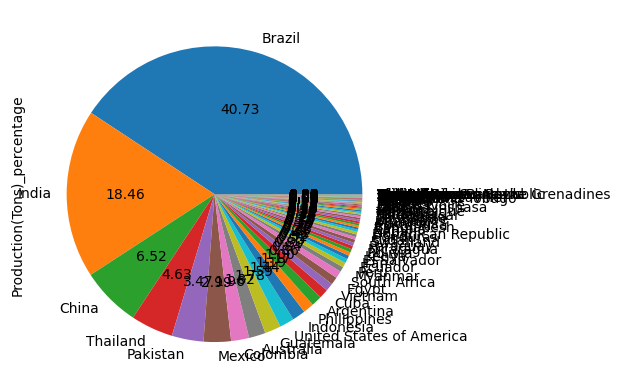

In [28]:
df_new['Production(Tons)_percentage'].plot(kind='pie', autopct="%.2f")

- brazil is the largest producer of the sugarcane.
- ~65% of the total production comes from Brazil, India, and China.

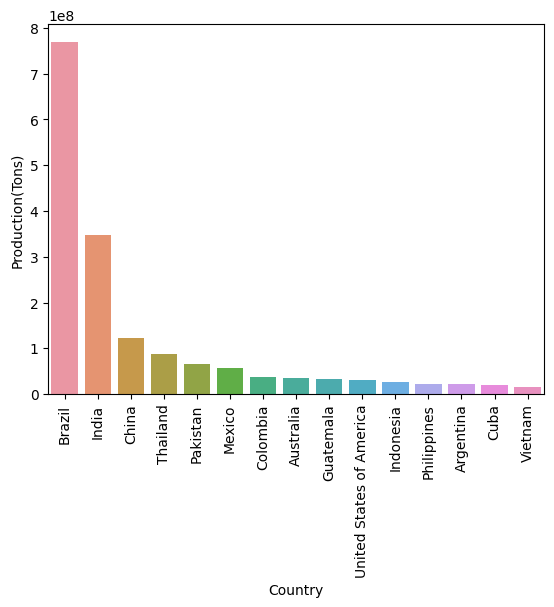

In [53]:
# df[['Country', 'Production(Tons)']].sort_values('Production(Tons)',ascending=False).set_index('Country').head(15).plot(kind='bar')

sns.barplot(df.sort_values('Production(Tons)', ascending=False).head(15), x='Country', y='Production(Tons)')
plt.xticks(rotation=90)
plt.show()

#### Which are the top five countries that produce the least sugarcane?

<Axes: ylabel='Production(Tons)_percentage'>

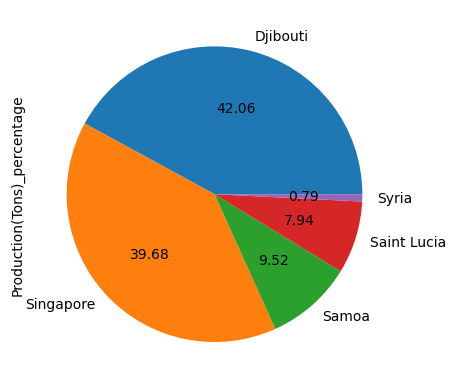

In [42]:
df_new['Production(Tons)_percentage'].sort_values(ascending=False).tail(5).plot(kind='pie', autopct='%.2f')

## Which country has highest land?

In [54]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Djibouti,Africa,53.0,51.000,NaN,NaN
100,Singapore,Asia,50.0,9.000,2.0,25.0
101,Samoa,Oceania,12.0,6.000,1.0,11949.8


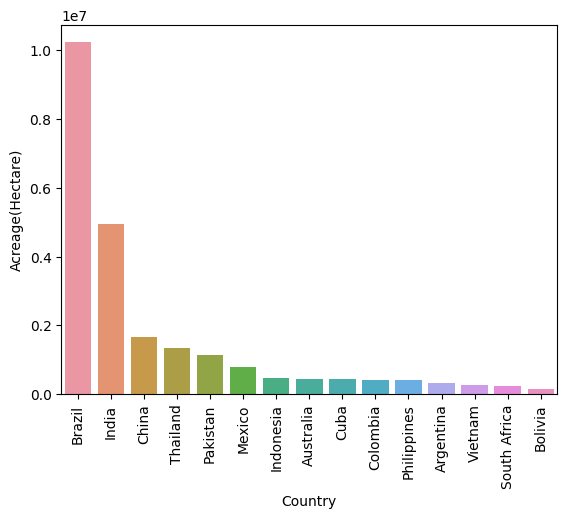

In [55]:
sns.barplot(df.sort_values('Acreage(Hectare)', ascending=False).head(15), x='Country', y='Acreage(Hectare)')
plt.xticks(rotation=90)
plt.show()

## Which country has highest yield per hectare?

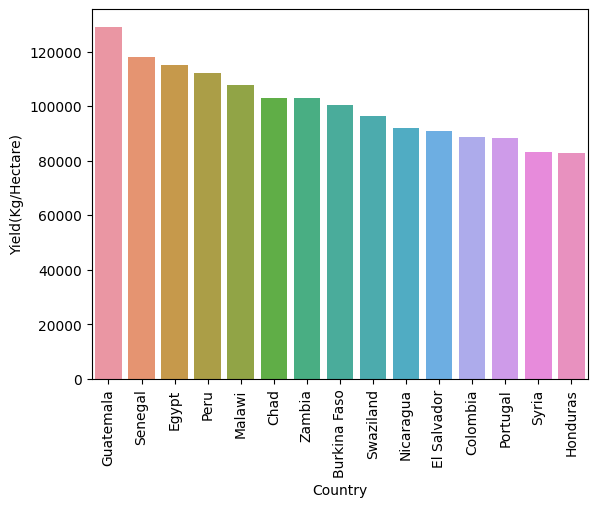

In [56]:
sns.barplot(df.sort_values('Yield(Kg/Hectare)', ascending=False).head(15), x='Country', y='Yield(Kg/Hectare)')
plt.xticks(rotation=90)
plt.show()

## Which country has highest production?

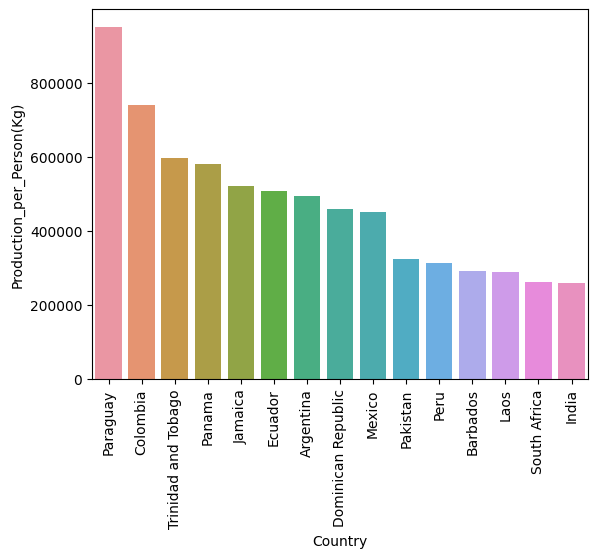

In [57]:
sns.barplot(df.sort_values('Production_per_Person(Kg)', ascending=False).head(15), x='Country', y='Production_per_Person(Kg)')
plt.xticks(rotation=90)
plt.show()

## Correlation

In [60]:
corr_df=df[['Production(Tons)', 'Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']]
corr_df.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_Person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

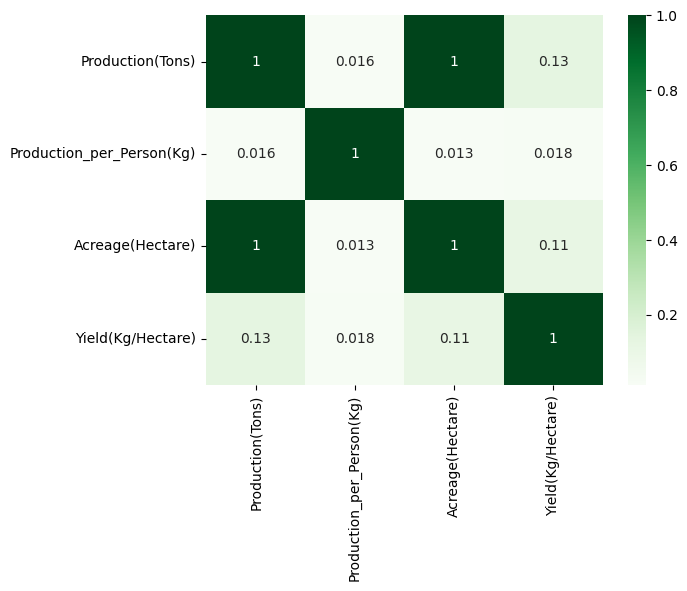

In [64]:
sns.heatmap(corr_df.corr(), annot=True, cmap='Greens')

## Do countries with highest land produce more sugarcane?

In [65]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Djibouti,Africa,53.0,51.000,NaN,NaN
100,Singapore,Asia,50.0,9.000,2.0,25.0
101,Samoa,Oceania,12.0,6.000,1.0,11949.8


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

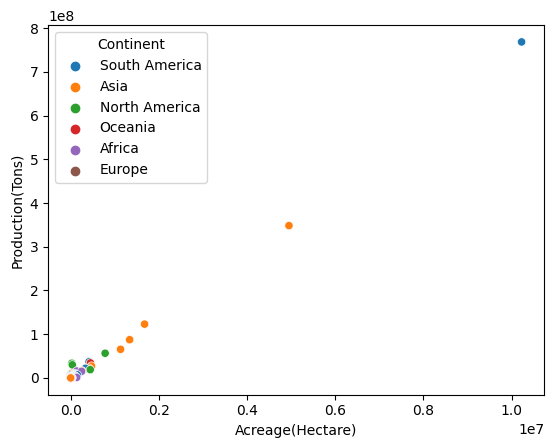

In [67]:
sns.scatterplot(df,x='Acreage(Hectare)', y='Production(Tons)', hue='Continent')

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

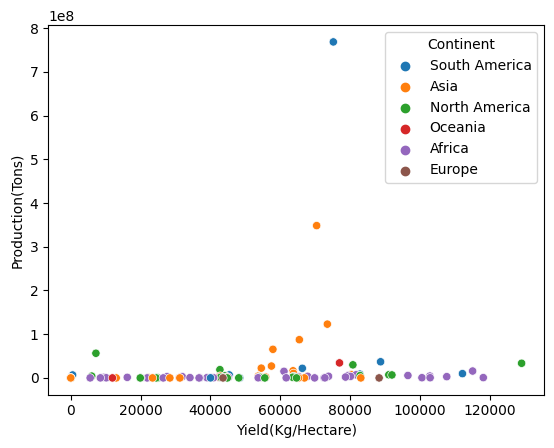

In [68]:
sns.scatterplot(df,x='Yield(Kg/Hectare)', y='Production(Tons)', hue='Continent')

## Analysis for Continent

In [71]:
continent_df=df.groupby(by='Continent').sum()

In [72]:
continent_df

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


## Which continent produces maximum sugarcane?

In [75]:
df_cont=continent_df.reset_index()

<Axes: xlabel='Continent', ylabel='Production(Tons)'>

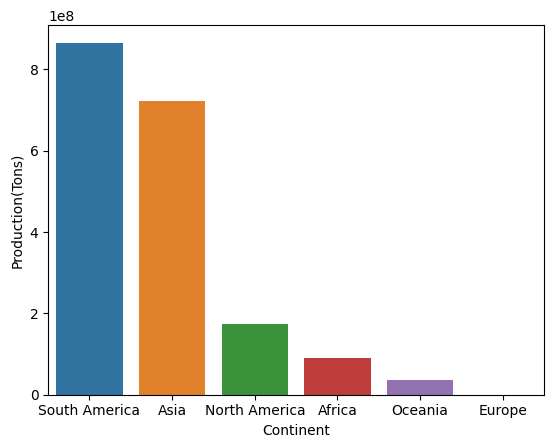

In [77]:
sns.barplot(df_cont.sort_values('Production(Tons)', ascending=False), x='Continent', y='Production(Tons)')

## Do number of countries in a Continent effects production of sugarcane?

In [79]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [99]:
continent_df= df.groupby(by='Continent').sum()
continent_df

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [105]:
continent_df['number_of_countries']=df.groupby('Continent').count()['Country']

In [107]:
continent_df=continent_df[['Country', 'number_of_countries', 'Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']]
continent_df

,Country,number_of_countries,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,39,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,25,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,2,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,22,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,4,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,11,865588126.0,3505531.738,11369236.0,677192.7


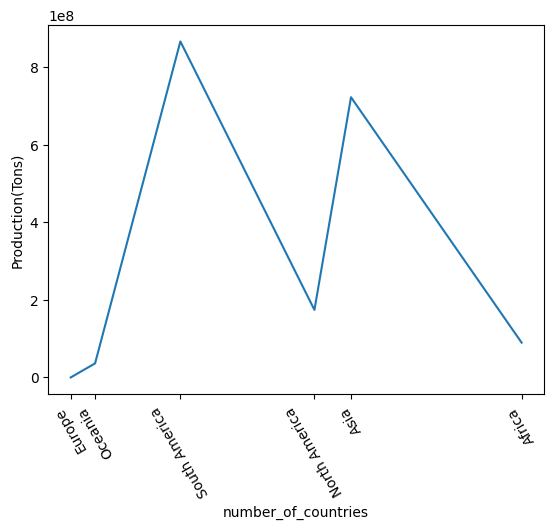

In [117]:
continent_names = continent_df.index.to_list()
sns.lineplot(continent_df, x='number_of_countries', y='Production(Tons)')
plt.xticks(continent_df['number_of_countries'], continent_names, rotation=120)
plt.show()

## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

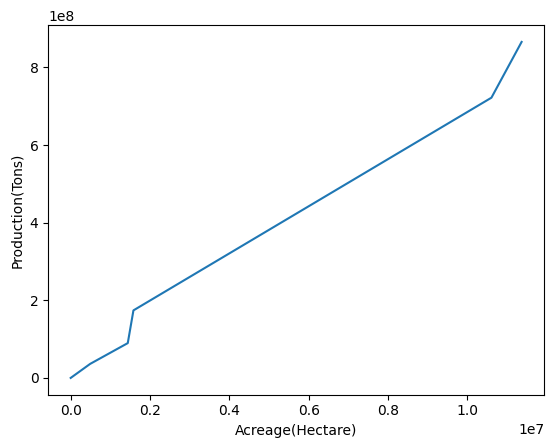

In [122]:
sns.lineplot(continent_df.sort_values('Acreage(Hectare)', ascending=False), x='Acreage(Hectare)', y='Production(Tons)')

## Production distribution by continent

<Axes: ylabel='Production(Tons)'>

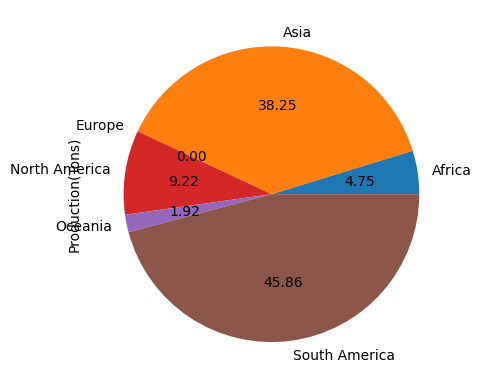

In [123]:
continent_df['Production(Tons)'].plot(kind='pie', autopct='%.2f')

## Continent corrrelation

In [124]:
cont_corr=continent_df[['number_of_countries', 'Production(Tons)', 'Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']]

In [125]:
cont_corr.corr()

,number_of_countries,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
number_of_countries,1.000000,0.098495,0.531984,0.122407,0.991746
Production(Tons),0.098495,1.000000,0.522207,0.994897,0.091201
Production_per_Person(Kg),0.531984,0.522207,1.000000,0.463211,0.542971
Acreage(Hectare),0.122407,0.994897,0.463211,1.000000,0.111166
Yield(Kg/Hectare),0.991746,0.091201,0.542971,0.111166,1.000000
